In [ ]:
!pip install numpy
!pip install pydirectory
!pip install tensorflow


In [1]:
import pandas as pd
import numpy 

import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.utils as utils
import tensorflow.keras.optimizers as optimizers
import tensorflow as tf

import matplotlib.pyplot as plt


In [2]:
#loads dataset into set of arrays 
def get_dataSet(): 
    XYcontent = numpy.load('C:\\Users\\travi\\Downloads\\Chess_data\\XYTrainingData50K.npz') # loads dataset
    x, y = XYcontent['x'], XYcontent['y']

    i = 0
    k = 0
    
    #size = len(x)
    #size = 2104781
    size = 2100000

    if (size % 10 != 0): # allows for clean allocation to trainSize
        cut = size % 10 # divisible by 10
        size = size - cut

    trainSize = int(size * 0.8)
    valSize = int(size * 0.2)
    
    # intialize matrices
    x_train = numpy.zeros((trainSize, 6, 8, 8), dtype=numpy.float32)
    y_train = numpy.zeros((trainSize, 6, 8, 8), dtype=numpy.float32)
    
    x_val = numpy.zeros((valSize, 6, 8, 8), dtype=numpy.float32)
    y_val = numpy.zeros((valSize, 6, 8, 8), dtype=numpy.float32)
    
    
    for i in range (size): # split into training data and validation data
        if (i < trainSize):
            x_train[i] = x[i]
            y_train[i] = y[i]
        else:
            x_val[k] = x[i]
            y_val[k] = y[i]
            k += 1
            
    return x_train, y_train, x_val, y_val, size


In [3]:
x_train, y_train, x_val, y_val = get_dataSet()

In [ ]:
# creating the RNN model
#timestep = 5

from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,SimpleRNN

model = Sequential(name = "Sequential")

#model.add(Embedding(input_dim=384, output_dim=384))
#model.add(InputLayer(input_shape = (6,8,8)))

# input_shape = (timestep, features)
model.add(SimpleRNN(384, return_sequences=True, activation="relu",input_shape = (5,384), name = "RNN"))
model.add(Dense(384, activation="tanh",input_shape = (6,8,8), name = "Dense_1"))
model.add(Dropout(rate = 0.2))
model.add(Dense((384), activation = 'softmax', name = "Dense_softmax")) 


In [ ]:
model.summary()

In [ ]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.utils as utils
import tensorflow.keras.optimizers as optimizers
#import tensorflow.keras.callbacks.EarlyStopping as EarlyStopping
import tensorflow as tf

model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error', metrics = ["accuracy", "mean_squared_error"]) # configures the model with losses and metrics

#reshape matrices for training
x_train_reshaped = numpy.reshape(x_train, (336000, 5, 384))
y_train_reshaped = numpy.reshape(y_train, (336000, 5, 384))
x_val_reshaped = numpy.reshape(x_train, (336000, 5, 384))
y_val_reshaped = numpy.reshape(y_train, (336000, 5, 384))

#convert matrices to tensor type
x_train_tensor = tf.convert_to_tensor(x_train_reshaped)
y_train_tensor = tf.convert_to_tensor(y_train_reshaped)
x_val_tensor = tf.convert_to_tensor(x_train_reshaped)
y_val_tensor = tf.convert_to_tensor(y_train_reshaped)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2) # stops training if loss plateaus

# this function trains the model
history = model.fit(x_train_tensor, y_train_tensor, # passing training data
          batch_size=25, # amount of data each iteration in an epoch sees
          epochs=200, # number of times it checks the data
          validation_data = (x_val_tensor, y_val_tensor),
          callbacks = [callback]) 

In [ ]:
test_scores = model.evaluate(x_val_reshaped, y_val_reshaped, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])
print("MSE:", test_scores[2])

NameError: name 'history' is not defined

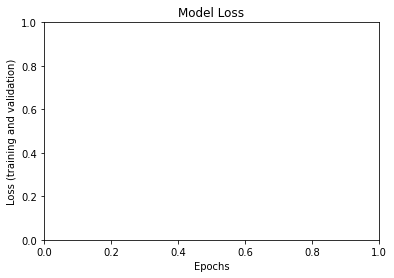

In [5]:
# Visualize training process

# Blue line is for Training Data
# Orange line is for Validation Data

plt.figure()
plt.title("Model Loss")
plt.ylabel("Loss (training and validation)")
plt.xlabel("Epochs")
plt.plot(history.history["loss"])
plt.legend(["Train Loss"])
plt.plot(history.history["val_loss"])
#plt.legend(["Validation Loss"])



plt.figure()
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])


In [ ]:
#saves the model
model.save(r"C:/Users/travi/Downloads/Chess_data/RNN/RNNmodel25KGames20B50E.tf")

In [4]:
# load the saved model
savedModel = models.load_model(
    r"C:/Users/travi/Downloads/Chess_data/RNN/RNNmodel50KGamesTanhCenter25B200E.tf", 
    custom_objects=None, 
    compile=True, 
    options=None)

In [2]:
# Convert the model to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(savedModel) # path to the SavedModel directory
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS] 
converter._experimental_lower_tensor_list_ops = False

tflite_model = converter.convert()

# Save the tflite model.
with open(r'C:/Users/travi/Downloads/Chess_data/RNN/RNNmodel50KGamesTanhCenter25B200E.tflite', 'wb') as f:
    f.write(tflite_model)
f.close()

NameError: name 'tf' is not defined